# Chapter 14


In [1]:
!pip install -q scipy

# Image Processing Techniques II


## Contour Detection


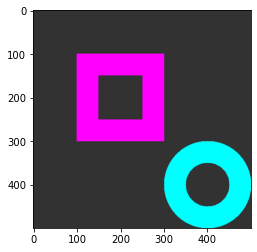

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = np.ones((500, 500, 3), dtype="uint8") * 50
cv.rectangle(img, (100, 100), (300, 300), (255, 0, 255), -1)
cv.rectangle(img, (150, 150), (250, 250), (50, 50, 50), -1)
cv.circle(img, (400, 400), 100, (255, 255, 0), -1)
cv.circle(img, (400, 400), 50, (50, 50, 50), -1)

cv.imwrite('square_circle.png', img)

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB) 

plt.show()

Find the Contours

detected contours (RETR_EXTERNAL): '2' 
detected contours (RETR_LIST): '4' 


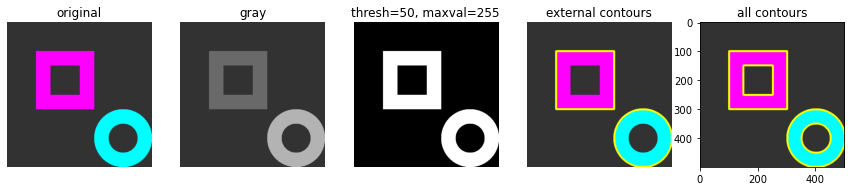

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('square_circle.png')

plt.figure(figsize=(15,8))

# image
# BGR to RGB
imgRGB = img[:, :, ::-1]
plt.subplot(1,5,1)
plt.imshow(imgRGB)
plt.title('original')
plt.axis('off')

# BGR to gray
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# gray to RGB
imgRGB = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)
plt.subplot(1,5,2)
plt.imshow(imgRGB)
plt.title('gray')
plt.axis('off')

# threshold
thresh = 50
maxval = 255
ret, thresh_img = cv.threshold(img_gray, thresh, maxval, cv.THRESH_BINARY)
# gray to RGB
imgRGB = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(1,5,3)
plt.imshow(imgRGB)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')

# find contours
contours, hierarchy = cv.findContours(thresh_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Show the number of detected contours for each call:
print("detected contours (RETR_EXTERNAL): '{}' ".format(len(contours)))
print("detected contours (RETR_LIST): '{}' ".format(len(all_contours)))

# draw the external contours
img_ext_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in contours:
    cv.drawContours(img_ext_contour, [contour], 0, color, thickness)

# BGR to RGB
imgRGB = img_ext_contour[:, :, ::-1]
plt.subplot(1,5,4)
plt.imshow(imgRGB)
plt.title('external contours')
plt.axis('off')


# draw the external contours
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    cv.drawContours(img_all_contour, [contour], 0, color, thickness)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(1,5,5)
plt.imshow(imgRGB)
plt.title('all contours')

plt.show()

### Contours Compression

detected contours (RETR_LIST|CHAIN_APPROX_NONE): '4' 
contour: (284, 1, 2) (284, 2)
contour: (564, 1, 2) (564, 2)
contour: (404, 1, 2) (404, 2)
contour: (800, 1, 2) (800, 2)
detected contours (RETR_LIST|CHAIN_APPROX_SIMPLE): '4' 
contour: (148, 1, 2) (148, 2)
contour: (286, 1, 2) (286, 2)
contour: (8, 1, 2) (8, 2)
contour: (4, 1, 2) (4, 2)
detected contours (RETR_LIST|CHAIN_APPROX_TC89_KCOS): '4' 
contour: (52, 1, 2) (52, 2)
contour: (82, 1, 2) (82, 2)
contour: (4, 1, 2) (4, 2)
contour: (4, 1, 2) (4, 2)
detected contours (RETR_LIST|CHAIN_APPROX_TC89_L1): '4' 
contour: (44, 1, 2) (44, 2)
contour: (106, 1, 2) (106, 2)
contour: (4, 1, 2) (4, 2)
contour: (4, 1, 2) (4, 2)


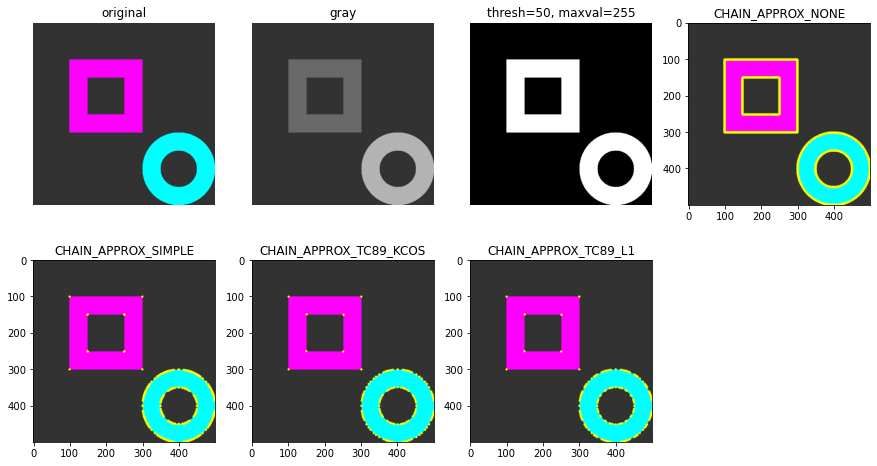

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('square_circle.png')

plt.figure(figsize=(15,8))

# image
# BGR to RGB
imgRGB = img[:, :, ::-1]
plt.subplot(2,4,1)
plt.imshow(imgRGB)
plt.title('original')
plt.axis('off')

# BGR to gray
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# gray to RGB
imgRGB = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)
plt.subplot(2,4,2)
plt.imshow(imgRGB)
plt.title('gray')
plt.axis('off')

# threshold
thresh = 50
maxval = 255
ret, thresh_img = cv.threshold(img_gray, thresh, maxval, cv.THRESH_BINARY)
# gray to RGB
imgRGB = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(2,4,3)
plt.imshow(imgRGB)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')

# find contours
# CHAIN_APPROX_NONE
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_NONE): '{}' ".format(len(all_contours)))

# draw the external contours
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    # print(contour.shape)
    squeeze = np.squeeze(contour)
    # print(squeeze.shape)
    print('contour:',contour.shape, squeeze.shape)

    for p in squeeze:
        pp = tuple(p.reshape(1, -1)[0])
        cv.circle(img_all_contour, pp, 3, color, -1)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,4)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_NONE')

# CHAIN_APPROX_SIMPLE
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_SIMPLE): '{}' ".format(len(all_contours)))

# draw the external contours
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    # print(contour.shape)
    squeeze = np.squeeze(contour)
    print('contour:',contour.shape, squeeze.shape)

    for p in squeeze:
        pp = tuple(p.reshape(1, -1)[0])
        cv.circle(img_all_contour, pp, 3, color, -1)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,5)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_SIMPLE')

# CHAIN_APPROX_TC89_KCOS
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_TC89_KCOS)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_TC89_KCOS): '{}' ".format(len(all_contours)))

# draw the external contours
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    # print(contour.shape)
    squeeze = np.squeeze(contour)
    print('contour:',contour.shape, squeeze.shape)

    for p in squeeze:
        pp = tuple(p.reshape(1, -1)[0])
        cv.circle(img_all_contour, pp, 3, color, -1)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,6)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_TC89_KCOS')

# CHAIN_APPROX_TC89_L1
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_TC89_L1)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_TC89_L1): '{}' ".format(len(all_contours)))

# draw the external contours
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    squeeze = np.squeeze(contour)
    print('contour:',contour.shape, squeeze.shape)

    for p in squeeze:
        pp = tuple(p.reshape(1, -1)[0])
        cv.circle(img_all_contour, pp, 3, color, -1)


# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,7)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_TC89_L1')


plt.show()

### Contour Functionality

detected contours: '1' 
contour: (14, 1, 2) (14, 2)


Text(0.5, 1.0, 'approxPolyDP')

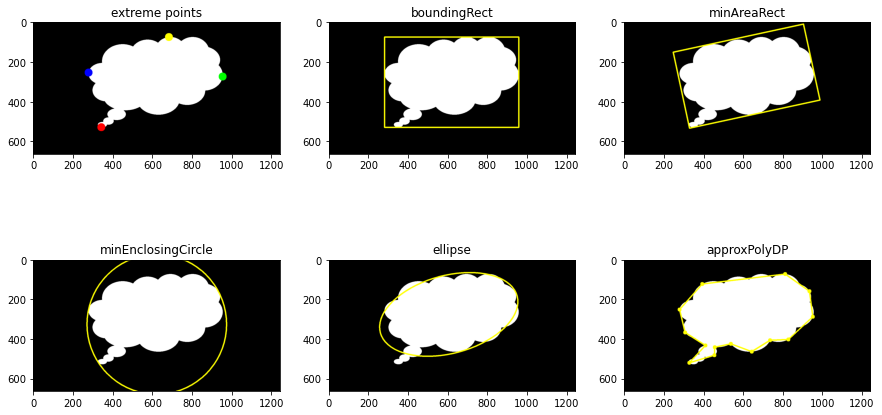

In [5]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("../samples/data/shape_features.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply cv2.threshold() to get a binary image:
ret, threshImg = cv.threshold(imgGray, 50, 255, cv.THRESH_BINARY)

# Find contours using the thresholded image:
# Note: cv2.findContours() has been changed to return only the contours and the hierarchy
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Show the number of detected contours:
print("detected contours: '{}' ".format(len(contours)))

# Create copy of the original image to perform the visualization of each operation:
imgBoundingRect = img.copy()
imgMinAreaRect = img.copy()
imgFitEllipse = img.copy()
imgMinEnclosingCircle = img.copy()
imgApproxPolyDP = img.copy()

# 1. cv2.boundingRect():
x, y, w, h = cv.boundingRect(contours[0])
cv.rectangle(imgBoundingRect, (x, y), (x + w, y + h), (0, 255, 255), 5)

# 2. cv2.minAreaRect():
minAreaRect = cv.minAreaRect(contours[0])
box = cv.boxPoints(minAreaRect)
box = np.int0(box)
cv.polylines(imgMinAreaRect, [box], True, (0, 255, 255), 5)

# 3. cv2.minEnclosingCircle():
(x, y), radius = cv.minEnclosingCircle(contours[0])
center = (int(x), int(y))
radius = int(radius)
cv.circle(imgMinEnclosingCircle, center, radius, (0, 255, 255), 5)

# 4. cv2.fitEllipse():
ellipse = cv.fitEllipse(contours[0])
cv.ellipse(imgFitEllipse, ellipse, (0, 255, 255), 5)

# 5. cv2.approxPolyDP():
epsilon = 0.01 * cv.arcLength(contours[0], True)
approxPolyDP = cv.approxPolyDP(contours[0], epsilon, True)
color = (0, 255, 255)
thickness = 5
for contour in [approxPolyDP]:
    cv.drawContours(imgApproxPolyDP, [contour], 0, color, thickness)
color = (0, 255, 255)
thickness = 5
for contour in [approxPolyDP]:
    # draw points
    squeeze = np.squeeze(contour)
    print('contour:',contour.shape, squeeze.shape)
    for p in squeeze:
        pp = tuple(p.reshape(1, -1)[0])
        cv.circle(imgApproxPolyDP, pp, 10, color, -1)

# 6. Detect extreme points of the contour:
contour = contours[0]
left = tuple(contour[contour[:, :, 0].argmin()][0])
right = tuple(contour[contour[:, :, 0].argmax()][0])
top = tuple(contour[contour[:, :, 1].argmin()][0])
bottom = tuple(contour[contour[:, :, 1].argmax()][0])
cv.circle(img, left, 20, (255, 0, 0), -1)
cv.circle(img, right, 20, (0, 255, 0), -1)
cv.circle(img, top, 20, (0, 255, 255), -1)
cv.circle(img, bottom, 20, (0, 0, 255), -1)

# Plot the image:
plt.figure(figsize=(15,8))
# BGR to RGB
imgRGB = img[:, :, ::-1]
plt.subplot(2,3,1)
plt.imshow(imgRGB)
plt.title('extreme points')

# BGR to RGB
imgRGB = imgBoundingRect[:, :, ::-1]
plt.subplot(2,3,2)
plt.imshow(imgRGB)
plt.title('boundingRect')

# BGR to RGB
imgRGB = imgMinAreaRect[:, :, ::-1]
plt.subplot(2,3,3)
plt.imshow(imgRGB)
plt.title('minAreaRect')

# BGR to RGB
imgRGB = imgMinEnclosingCircle[:, :, ::-1]
plt.subplot(2,3,4)
plt.imshow(imgRGB)
plt.title('minEnclosingCircle')

# BGR to RGB
imgRGB = imgFitEllipse[:, :, ::-1]
plt.subplot(2,3,5)
plt.imshow(imgRGB)
plt.title('ellipse')

# BGR to RGB
imgRGB = imgApproxPolyDP[:, :, ::-1]
plt.subplot(2,3,6)
plt.imshow(imgRGB)
plt.title('approxPolyDP')


## Filtering


## Drawing
